# Discrete Mixture of PDFs

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch.distributions import Normal, Independent
from probabll.distributions import MixtureSameFamily, MixtureOfGaussians

In [2]:
B = 4 
K = 3
D = 1
gaussians = Normal(
    #torch.zeros([B, K, D]), torch.ones([B, K, D])
    torch.tensor(np.array([np.ones(D) * k for k in np.arange(K) - K // 2], dtype=np.float32)), 
    torch.ones([K, D]) * 0.2
)

components = Independent(gaussians, 1)
#components = gaussians
logits = torch.ones([K])
print(components.batch_shape, components.event_shape, logits.shape)

torch.Size([3]) torch.Size([1]) torch.Size([3])


In [3]:
mog = MixtureSameFamily(    
    logits=logits, 
    components=components)

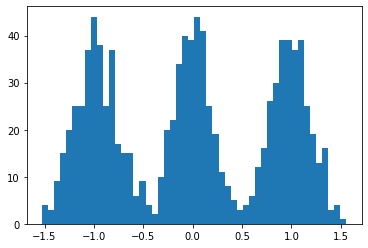

In [4]:
_ = plt.hist(mog.sample(torch.Size([1000])).numpy().flatten(), 50, density=False)     

In [7]:
Independent(Normal(0, 1), 0).base_dist.cdf(0)

tensor(0.5000)